# <center>By `Udayabhanu Nayak`🎯 CSE Grad 2024</center>

# <center>Linear Regression</center>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df= pd.read_csv('BostonHousing.csv')

In [3]:
df.head(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [4]:
df.shape

(506, 14)

In [5]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         5
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [6]:
df.dropna(inplace = True)

### Defining Feature and Target

In [7]:
X = df.drop('medv', axis = 1)

In [8]:
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [9]:
y = df['medv']

In [10]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: medv, dtype: float64

### train test split 

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

In [12]:
X_train.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
120,0.06899,0.0,25.65,0,0.581,5.870,69.7,2.2577,2,188,19.1,389.15,14.37
47,0.22927,0.0,6.91,0,0.448,6.030,85.5,5.6894,3,233,17.9,392.74,18.80
17,0.78420,0.0,8.14,0,0.538,5.990,81.7,4.2579,4,307,21.0,386.75,14.67
468,15.57570,0.0,18.10,0,0.580,5.926,71.0,2.9084,24,666,20.2,368.74,18.13
362,3.67822,0.0,18.10,0,0.770,5.362,96.2,2.1036,24,666,20.2,380.79,10.19


In [13]:
y_train.head()

120    22.0
47     16.6
17     17.5
468    19.1
362    20.8
Name: medv, dtype: float64

### standardizing the dataset

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

### fit and transform only on training data

In [15]:
X_train=scaler.fit_transform(X_train)

### transform only on testing data

In [16]:
X_test=scaler.transform(X_test)

# LinearRegression

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
regression=LinearRegression()

In [19]:
regression.fit(X_train,y_train)

LinearRegression()

## cross validation


In [20]:
from sklearn.model_selection import cross_val_score

In [21]:
mse=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=10)

In [22]:
np.mean(mse)

-28.308207197208908

### prediction 


In [23]:
reg_pred=regression.predict(X_test)

In [24]:
reg_pred

array([11.18470187, 23.00563404, 15.50555989, 33.91377385, 22.85033375,
       11.52120718, 12.87909485, 19.68559436, 21.04526151, 11.33123451,
       18.86863905, 30.14960371, -1.11832542, 25.62332993,  2.86892345,
        8.03143995, 23.74581797, 18.48006615, 25.08802436, -6.69909852,
       13.05721404, 18.91286419, 27.07854376, 19.68268673, 22.34432239,
       16.60552708, 28.66835041, 26.17851266, 18.28698048, 20.9648065 ,
       20.99274995, 30.45869773, 17.88348023, 31.45467817, 31.04568544,
       21.85781507,  7.19466076, 23.35955087,  7.67299185, 25.28772941,
       13.06751099, 35.87850613, 14.55527766, 30.48366917, 12.54855213,
       28.33694316, 30.32808565, 19.98874661, 18.58460772, 13.49196425,
       23.92954047, 33.0591127 , 16.37371772, 11.0238909 , 34.65082608,
       33.84119359, 17.64417679, 18.519131  , 16.23822474, 27.42388838,
       20.31971468, 40.40623824, 20.22919151,  8.17914399, 25.84915232,
       27.38356934, 11.67432851,  7.40048488, 27.04285183, 16.64

C:\Users\udaya\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


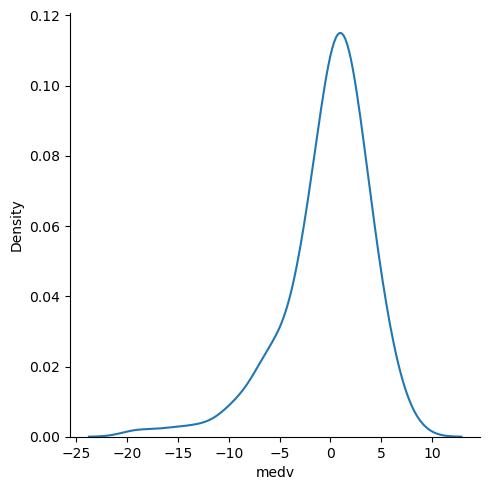

In [25]:
import seaborn as sns
sns.displot(reg_pred-y_test,kind='kde')

### r2_score

In [26]:
from sklearn.metrics import r2_score

In [27]:
score=r2_score(reg_pred,y_test)

In [28]:
score

0.7507988784477893